In dieser Arbeit werden Machine-Learning-Verfahren im Hinblick auf die Vorhersage von Diabetes untersucht. Ziel ist es, ausgewählte Klassifikationsalgorithmen – insbesondere logistische Regression, Support Vector Machines (SVM) und k-Nearest Neighbors (KNN) – auf ihre Leistungsfähigkeit zu vergleichen.

Als Datengrundlage dient der öffentlich verfügbare Diabetes Prediction Dataset von Kaggle, der sowohl demografische Merkmale (z. B. Alter, Geschlecht, Raucherstatus) als auch medizinische Werte wie BMI, Blutzucker- und HbA1c-Werte enthält. Die Vorgehensweise umfasst die Datenvorverarbeitung, das Trainieren der Modelle in Python (Scikit-Learn) sowie die Bewertung mithilfe von Metriken wie Accuracy, Precision, Recall, F1-Score und ROC-Kurve. Die Ergebnisse werden abschließend vergleichend analysiert und visuell aufbereitet.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

<h4 style="font-size:18px">Semesterabschließende schriftliche Ausarbeitung im Modul Machine Learning (Sommersemester 2025)</h4>
<h1 style="font-size:32px">Vergleich von Klassifikationsalgorithmen zur Vorhersage von Diabetes anhand des Kaggle-Datensatzes: Eine Analyse mit logistischer Regression, SVM und KNN</h1>
<h2 style="font-size:18px">von Julian Tomsa</h2>

## Inhaltsverzeichnis
**1. Einleitung**
   - 1.1 Diabetes Typ 1
   - 1.2 Diabetes Typ 2
   - 1.3 Zielsetzung

**2. Datenbeschreibung**
   - 2.1 Datensatzbeschreibung
   - 2.2 Datenvorverarbeitung

**3. Methodik**
   - 3.1 Logistische Regression
   - 3.2 Support Vector Machines (SVM)
    - 3.3 k-Nearest Neighbors (KNN)

## 1. Einleitung

   Diabetes oder auch umgangsprachlich die Zuckerkranheit (lateinisch: Diabetes mellitus
   ist ein Überbegriff für eine Gruppe von Stoffwechselerkrankungen. Bei Diabetes ist der
   Blutzuckerspiegel dauerhaft erhöht, was zu verschiedenen gesundheitlichen Problemen
   führen kann. Die Krankheit kann in zwei Haupttypen unterteilt werden: Typ 1 und Typ 2.
   Typ 1
   ist eine Autoimmunerkrankung, bei der die Insulin produzierenden Zellen in der
   Bauchspeicheldrüse zerstört werden. Typ 2 hingegen ist oft mit Übergewicht und
   Bewegungsmangel
   verbunden und kann durch Lebensstiländerungen und Medikamente behandelt werden.
    Unbehandelt kann Diabetes zu schwerwiegenden Komplikationen wie Herzkrankheiten,
    Nierenerkrankungen, Augenproblemen und Nervenschäden führen. Eine frühzeitige Diagnose
   und Behandlung sind entscheidend, um die Krankheit zu kontrollieren und das Risiko von
   Komplikationen zu verringern. Diabetes kann man durch eine Blutuntersuchung diagnostizieren,
   bei der der Blutzuckerspiegel gemessen wird.

---

   <div style="text-align:center;">
  <img src="image/Regelkreis-Zucker.png" alt="Regelkreis Zucker" style="max-height:350px;" />
  <div>Quelle: https://praxis-beylich.de/wp-content/uploads/2018/02/Regelkreis-Zucker.png</div>
</div>

---

### 1.1 Diabetes Typ 1
   Die Ursache des Typ 1 Diabetes ist ein absoluter Mangel an Insulin, ein Hormon, das für die Regulierung des Blutzuckerspiegels verantwortlich ist. Weshalb dieser Diabetestyp auch
   insulinabhängiger Diabetes mellitus heißt. Er wird durch das absolute Versagen durch die Zellen in der Bauchspeicheldrüse verursacht, die das Hormon Insulin produziert. Diabetes
   Typ 1 beginnt meistens in Kinder- und Jugendalter, kann aber auch bei Erwachsenen auftreten. Bisher ist Diabetes Typ 1 nicht heilbar, aber mit Insulintherapie und anderen
   Behandlungen kann der Blutzuckerspiegel kontrolliert werden. Die betroffenen Personen müssen ihr ganzes Leben den Blutzuckerspiegel überwachen und Insulin spritzen, um den
   Blutzuckerspiegel im Normalbereich zu halten.

### 1.2 Diabetes Typ 2
   Diabetes Typ 2 ist die häufigste Form von Diabetes und tritt auf, zum einen durch verminderte Empfindlichkeit der Körperzellen für Insulin (Insulinresistenz), zum anderen führt
   eine jahrelange Überproduktion von Insulin zu einer "Erschöpfung" der insulinproduzierenden Zellen (die Bauchspeicheldrüse kann nicht genügend Insulin für den erhöhten Bedarf
   liefern). Diabetes Typ 2 tritt häufig bei älteren Menschen auf, kann aber auch bei jüngeren Menschen auftreten, insbesondere bei Übergewichtigen und Menschen mit einem
   ungesunden Lebensstil. Die Behandlung von Diabetes Typ 2 umfasst in der Regel Änderungen des Lebensstils, wie z. B. eine gesunde Ernährung und regelmäßige Bewegung, sowie
   Medikamente zur Regulierung des Blutzuckerspiegels.

### 1.3 Zielsetzung
   Ziel dieser Arbeit ist es, verschiedene Klassifikationsalgorithmen zu vergleichen, um die Vorhersage von Diabetes zu verbessern. Dabei werden insbesondere die logistische
   Regression,
   Support Vector Machines (SVM) und k-Nearest Neighbors (KNN) untersucht. Die Algorithmen werden auf einem öffentlich zugänglichen Datensatz trainiert und evaluiert, um ihre
   Leistungsfähigkeit in Bezug auf Genauigkeit, Präzision, Recall und F1-Score zu bewerten. Die Ergebnisse werden anschließend vergleichend analysiert und visuell aufbereitet.


## 2. Datenbeschreibung
### 2.1 Datensatzbeschreibung
   Der Datensatz, der für diese Analyse verwendet wird, enthält verschiedene Merkmale, die mit Diabetes in Verbindung stehen. Dazu gehören demografische Informationen wie Geschlecht (gender) und
   Alter (age) sowie medizinische Werte wie Body-Mass-Index (BMI), Blutzucker- (blood_glocose_level) und HbA1c-Werte (HbA1c_level). Der Datensatz ist öffentlich zugänglich und wurde von Kaggle bereitgestellt.

   ---

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.head()) # first 5 rows of the dataset

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


---
### 2.2 Datenvorverarbeitung
   Die Datenvorverarbeitung umfasst mehrere Schritte, um sicherzustellen, dass die Daten für die Analyse geeignet sind. Dazu gehören das Entfernen von Duplikaten, die in diesem Fall
   aber nicht Sinnvoll ist, da es mehrere Menschen geben kann, die gleiche Merkmale auf zeigen (bei 100.000 Personen wahrscheinlich), das Behandeln von fehlenden Werten und das
   Konvertieren von Datentypen. Darüber hinaus werden die Merkmale normalisiert oder skaliert, um sicherzustellen, dass sie für die Algorithmen geeignet sind.

   Im Folgenden wird der Datensatz eingelesen und aufbereitet.
   Die Spalte "diabetes" ist die Zielvariable, die angibt, ob eine Person Diabetes hat (1) oder nicht (0). Die Kategorischen Variablen sollten aber noch in numerische Variablen umgewandelt werden. Ein Beispiel bei <code>gender</code>, da es drei verschiedene Werte gibt. Es gibt Male/Female/Other man könnte es in 0/1/2 umwandeln. Aber in diesem Fall wird es mit One-Hot-Encoding gemacht. One-Hot-Encoding erstellt für jede Kategorie eine eigene Spalte, die entweder <code>True</code> oder <code> False</code> ist, je nachdem, ob die Kategorie zutrifft oder nicht. Das selbe wird für die Spalte <code>smoking_history</code> gemacht. Im weiteren werden numerische Werte geprüft und gegebenenfalls bereinigt. Das Bedeutet zum Beispiel, dass negative werte bei <code>bmi</code> oder >code>age</code> entfernt werden. Aber auch werte die unrealistisch sind, wie z.B. ein BMI von 100 oder ein Alter von 200 Jahren. Abschließend werden die Daten in Trainings- und Testdaten aufgeteilt.


In [3]:
# Datensatz einlesen
df = pd.read_csv('diabetes_prediction_dataset.csv')
allItems = len(df)
# Fehlende Werte behandeln (z.B. mit Mittelwert/Modus auffüllen)
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Unrealistische Werte entfernen
df = df[(df['age'] > 0) & (df['age'] < 120)]
df = df[(df['bmi'] > 10) & (df['bmi'] < 70)]

# Nur die gewünschten Features auswählen
features = ['HbA1c_level', 'blood_glucose_level', 'bmi']
X = df[features]
y = df['diabetes']

# Skalierung der numerischen Merkmale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Die Vorbereitete und Bereinigte Datensatz sieht nun so als Tabelle aus:

In [4]:
import pandas as pd

# Nur die gewünschten Features ausgeben
print(df[['diabetes','HbA1c_level', 'blood_glucose_level', 'bmi']].head())
#Zeigt die ersten 5 Zeilen des bereinigten Datensatzes

   diabetes  HbA1c_level  blood_glucose_level    bmi
0         0          6.6                  140  25.19
1         0          6.6                   80  27.32
2         0          5.7                  158  27.32
3         0          5.0                  155  23.45
4         0          4.8                  155  20.14


In [5]:
diabetes = (df['diabetes'] == 1).sum()
noDiabetes = (df['diabetes'] == 0).sum()
print("Anzahl aller Einträge in dem Datensatz: " , allItems)
print("Anzahl der Einträge nach bereinigung: " , diabetes+noDiabetes)
print("Anzahl Diabetes:", diabetes)
print("Anzahl kein Diabetes:", noDiabetes)

Anzahl aller Einträge in dem Datensatz:  100000
Anzahl der Einträge nach bereinigung:  99981
Anzahl Diabetes: 8494
Anzahl kein Diabetes: 91487


Nach der Bereinigung sind es noch 99981 Einträge. Davon haben 8494 Personen Diabetes und 91487 Personen haben kein Diabetes. Das sind ca. 8.5% der Personen im Datensatz, die Diabetes haben. Zudem gibt es vier Spalten. Die Spalte <code>HbA1c_level</code> gibt den HbA1c-Wert an, der den durchschnittlichen Blutzuckerspiegel der letzten 2-3 Monate widerspiegelt. Die Spalte <code>blood_glucose_level</code> gibt den aktuellen Blutzuckerspiegel an, der in mg/dL gemessen wird. Die Spalte <code>bmi</code> gibt den Body-Mass-Index an, der das Verhältnis von Gewicht zu Körpergröße ist und als Indikator für Übergewicht oder Untergewicht verwendet wird. Die Zielvariable <code›diabetes‹/code> gibt an, ob eine Person Diabetes hat (1) oder nicht (0). Es sind nur diese Spalten, da diese Werte am ausschlaggebenden sind, ob zu ermitteln ob eine Person DDiabetes hat oder nicht. Es werden auch nur wenige Feature verwendet, um die Modelle nicht zu überladen und die Ergebnisse besser vergleichen zu können.

## 3. Methodik
   In diesem Abschnitt werden die ausgewählten Klassifikationsalgorithmen beschrieben, die für die Vorhersage von Diabetes verwendet werden. Dazu gehören die logistische Regression, Support Vector Machines (SVM) und k-Nearest Neighbors (KNN). Für jeden Algorithmus wird die Funktionsweise erläutert und die Implementierung in Python mit der Bibliothek Scikit-Learn beschrieben. Zu erst werden alle Algorithmen trainiert und erst danach werden sie mit Metriken wie Accuracy, Precision, Recall, F1-Score und ROC-Kurve verglichen.

### 3.1 Logische Regression
   Die logistische Regression ist ein statistisches Modell, das verwendet wird, um die Wahrscheinlichkeit eines binären Ergebnisses vorherzusagen. In diesem Fall wird sie verwendet, um die Wahrscheinlichkeit vorherzusagen, ob eine Person Diabetes hat (1) oder nicht (0). Die logistische Regression modelliert die Beziehung zwischen den unabhängigen Variablen (Features) und der abhängigen Variable (Zielvariable) durch eine logistische Funktion. Die logistische Funktion gibt Werte zwischen 0 und 1 zurück, die als Wahrscheinlichkeiten interpretiert werden können. Die logistische Regression wird in Python mit der Bibliothek Scikit-Learn implementiert. Der folgende Code zeigt, wie die logistische Regression auf den vorbereiteten Datensatz angewendet wird:



In [6]:
# Modell erstellen und trainieren
logreg = LogisticRegression(max_iter=90000, random_state=42)
logreg.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred = logreg.predict(X_test)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit der logistischen Regression: {accuracy:.4f}') #Kurzer Test der genauigkeit
print("Model erwartet Features:", logreg.n_features_in_)

Genauigkeit der logistischen Regression: 0.9563
Model erwartet Features: 3


Was macht der Code hier? Zuerst wird ein LogisticRegression-Objekt mit maximal 90000 Iterationen un einem festen Zufallswert (random_state = 42) erstellt. Der random_state sorgt dafür, dass die Ergebnisse reproduzierbar sind. Da die Zielvariable binär ist also 0 oder 1, ist die logistische Regression ein geeigneter Algorithmus. Nach dem Erstellen des Modells wird es mit den Trainingsdaten trainiert. Dies macht die funktion <cod>fit()</code>. Der nächste Schritt nach dem Trainieren, die eine Vorhersage auf den Testdaten zu machen, diese wird mit der Funktion <code>predict()</code> gemacht. Man macht diese Vorhersage, um das trainierte Modell zu testen, um zu sehen, wie gut es trainiert wurde. Abschließend wird die Genauigkeit der Vorhersagen mit der Funktion <code>accuracy_score()</code> berechnet und ausgegeben. Die Genauigkeit gibt an, wie viele der Vorhersagen korrekt waren.

### 3.2 Support Vector Machines (SVM)
   Das nächste Modell, das untersucht wird, sind die Suport Vector Machines (SVM). SVMs sind überwachte Lernmodelle, die für Klassikifikations- und Regressionsaufgaben verwendet werden. Das Hauptziel von SVMs ist es, eine optimale Trennlinie zu finden. Eine SVM Grafik sieht so aus:

---
<div style="text-align:center;">
  <img src="image/3-1_svm_optimal-hyperplane_max-margin_support-vectors-2-1.png" alt="Grafik SVM" style="max-height:350px;" />
  <div>
<a>Quelle: https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/creative-assets/s-migr/ul/g/8f/27/3-1_svm_optimal-hyperplane_max-margin_support-vectors-2-1.png</a></div>
</div>

---
   Support Vector Machines versuchen, eine Trennlinie zufinden, die die Datenpunkte verschiedener Klassen zu trennen. Diese Trennlinie wird als Hyperplane bezeichnet. Das Ziel ist es, den Abstand (Margin) zwischen dem Hyperplane und den nächst gelgenden Datenpunkten zu maximieren. Die Datenpunkte, die am nächsten an der Hyperplane liegen, werden als Support Vector bezteichnet. Ein Vorteil von SVMs ist es, dass sie auch mit nicht-linear separierbaren Daten umgehen können. In diesem Datensatz wird nur eine lineare SVM verwendet, da die Daten gut trennbar sind. Die Linie der Hyperplane wird zwischen der Diabetes und Nicht-Diabetes gezogen.

In [7]:
# ACHTUNG: Kann etwas länger dauern!
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
# Vorhersagen auf Testdaten
y_pred_svm = svm.predict(X_test)
# Genauigkeit berechnen
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Genauigkeit der SVM: {accuracy_svm:.4f}')
print("Model erwartet Features:", svm.n_features_in_)

Genauigkeit der SVM: 0.9554
Model erwartet Features: 3


### 3.3 k-Nearest Neighbors (KNN)
   Der letzte Algorithmus, der in dieser Arbeit untersucht wird, ist der k-Nearest Neighbors (KNN) Algorithmus. KNN ist ein einfacher, aber effektiver Klassifikationsalgorithmus, der auf dem Konzept der Ähnlichkeit basiert. Der KNN-Algorithmus funktioniert, indem er die k nächsten Nachbarn eines neuen Datenpunkts in den Trainingsdaten findet und die Klasse des neuen Datenpunkts basierend auf der Mehrheit der Klassen dieser Nachbarn vorhersagt. Der Wert von k ist ein Hyperparameter, der vom Benutzer festgelegt wird und die Anzahl der Nachbarn angibt, die berücksichtigt werden sollen. In diesem Fall wird k auf 5 gesetzt, was bedeutet, dass die 5 nächsten Nachbarn verwendet werden, um die Klasse des neuen Datenpunkts vorherzusagen.

---

<!--<div style="text-align:center;">
  <img src="image/KNN.png" alt="KNN" style="max-height:350px;" />
  <div>Quelle: https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.png</div>
</div>-->

<div style="text-align:center;">
  <img src="image/knn-kaggle.png" alt="KNN" style="max-height:350px;" />
  <a>Quelle: https://th.bing.com/th/id/R.5680ba7394c320efaa16adfe9b5a1cf2?rik=6y4BP3dnfrmuvA&riu=http%3a%2f%2fwww.datasciencelovers.com%2fwp-content%2fuploads%2f2020%2f03%2fk-nearest-neighbor2.png&ehk=VprLSRTXghhpziYSxSXqAkCDmoZSLarGS26xo9F2GmY%3d&risl=&pid=ImgRaw&r=0</a>
</div>

---

Wie in der Abbildung dargestellt gibt es zwei Klassen oder auch Kategorien. In diese Arbeit wäre zum Beispiel Category A Personen mit Diabetes und Category B Personen ohnen Diabetes. Diese zwei Gruppen befinden sich als Beispiel in einem Raum. Eine neue Person betritt den Raum und soll sich einmal ein Ordnen. Der blauen Punkt im linken Bild stellt die neue Person dar. Der KNN-Algorithmus sucht nun die k nächsten Nachbarn dieser neuen Person. In diesem Fall sind es 5 Nachbarn (k=5), die gesucht werden. Die Nachbarn sind die nächsten zu dieser Person, in diesem Fall sind es 3 Personen aus Category A und 2 aus der Category B. Da die Mehrheit der Nachbarn aus Category A kommt, wird die neue Person ebenfalls in Category A eingeordnert.
Für den KNN-Algorithmus wird die Implementierung aus der Sklearn Bibliothek verwendet.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# KNN-Modell erstellen und trainieren
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Vorhersagen auf Testdaten
y_pred_knn = knn.predict(X_test)
# Genauigkeit berechnen
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Genauigkeit des KNN: {accuracy_knn:.4f}')
print("Model erwartet Features:", knn.n_features_in_)

Genauigkeit des KNN: 0.9618
Model erwartet Features: 3


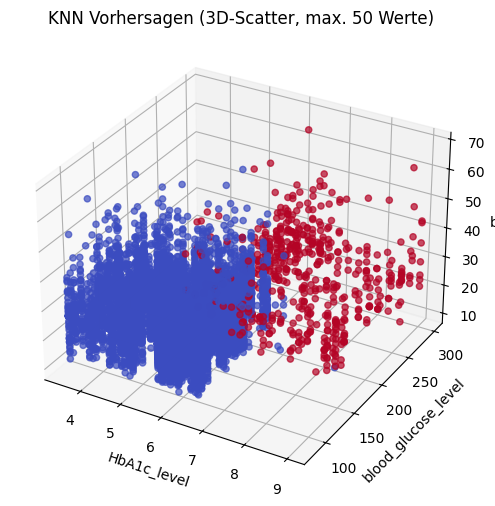

In [9]:

# Nur die ersten 50 Testdaten verwenden
n = 10000
indices = np.random.choice(len(X_test), n, replace=False)
X_plot = X_test.iloc[indices]
y_plot = y_pred_knn[indices]
X_plot = X_test[:n]
y_plot = y_pred_knn[:n]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_plot.iloc[:, 0], X_plot.iloc[:, 1], X_plot.iloc[:, 2], c=y_plot, cmap='coolwarm', alpha=0.7)
ax.set_xlabel('HbA1c_level')
ax.set_ylabel('blood_glucose_level')
ax.set_zlabel('bmi')
plt.title('KNN Vorhersagen (3D-Scatter, max. 50 Werte)')
plt.show()

## Quelle
[09.08.2025] https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

[24.08.2025] https://www.ibm.com/de-de/think/topics/support-vector-machine